In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

## Khám phá dữ liệu

In [2]:
HD_df = pd.read_csv("heart_disease_dataset_400.csv")

In [3]:
HD_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,0,3,125,522,0,0,126,0,2.8,1,0,1,0
1,57,1,3,126,137,0,0,84,0,0.9,1,2,1,1
2,43,0,2,160,220,0,2,98,1,1.1,0,0,3,1
3,71,1,1,111,427,1,0,148,1,3.1,0,0,1,0
4,36,1,3,118,511,1,1,200,0,2.6,0,3,1,0


In [4]:
HD_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
395,42,1,3,127,531,1,1,103,1,2.425540,2,2,2,1
396,36,0,0,127,266,1,1,128,0,0.000000,1,1,3,1
397,62,0,3,126,561,0,1,82,0,3.851519,1,0,1,0
398,68,1,0,140,237,1,0,156,0,1.125925,2,1,3,1
399,66,1,2,107,163,1,0,111,1,5.390264,0,1,1,0


In [ ]:
print(HD_df.shape)

print("Dataset có 400 dòng và 14 cột")

(400, 14)
Dataset có 150 dòng và 14 cột


In [6]:
print(HD_df.isnull().sum())
print("----------")
print("Không có giá trị null ở tất cả các cột")

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
----------
Không có giá trị null ở tất cả các cột


In [7]:
HD_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
HD_df_Cat = HD_df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']]
print("Các cột phân loại: ")
print("------------------------------------------------------------")
HD_df_Cat.head()

Các cột phân loại: 
------------------------------------------------------------


,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,0,3,0,0,0,1,0,1,0
1,1,3,0,0,0,1,2,1,1
2,0,2,0,2,1,0,0,3,1
3,1,1,1,0,1,0,0,1,0
4,1,3,1,1,0,0,3,1,0


In [9]:
HD_df_Num = HD_df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
print("Các cột dạng số: ")
print("------------------------------------------------------------")
HD_df_Num.head()

Các cột dạng số: 
------------------------------------------------------------


,age,trestbps,chol,thalach,oldpeak
0,67,125,522,126,2.8
1,57,126,137,84,0.9
2,43,160,220,98,1.1
3,71,111,427,148,3.1
4,36,118,511,200,2.6


## Phân tích tổng quát

In [10]:
print("Trung bình độ tuổi của bệnh nhân là: ", HD_df['age'].mean())

Trung bình độ tuổi của bệnh nhân là:  52.7875


In [11]:
print("Độ tuổi cao nhất của bệnh nhân mắc bệnh tim: ", HD_df['age'].max())

Độ tuổi cao nhất của bệnh nhân mắc bệnh tim:  77


In [12]:
print("Độ tuổi thấp nhất của bệnh nhân mắc bệnh tim: ", HD_df['age'].min())

Độ tuổi thấp nhất của bệnh nhân mắc bệnh tim:  29


In [13]:
print("Tổng số bệnh nhân nam và nữ (0 = nữ, 1 = nam):")
print(HD_df['sex'].value_counts().to_string())


Tổng số bệnh nhân nam và nữ (0 = nữ, 1 = nam):
0    209
1    191


In [14]:
print("Kiểu đau ngực phổ biến nhất: ")
print(HD_df['cp'].value_counts().to_string())

Kiểu đau ngực phổ biến nhất: 
3    137
0     96
2     85
1     82


In [15]:
print("Tổng số người có cholesterol cao hơn 300: ",HD_df[HD_df['chol']>300]['chol'].count())

Tổng số người có cholesterol cao hơn 300:  232


In [16]:
print("Tổng số người có chỉ số đường huyết cao hơn 120 mg/dl lúc đói: ", HD_df[HD_df['fbs']==1]['fbs'].count())

Tổng số người có chỉ số đường huyết cao hơn 120 mg/dl lúc đói:  175


## Phân tích mối quan hệ

In [ ]:
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

age_groups = pd.cut(HD_df['age'], bins=bins, labels=labels, right=False)

In [18]:
grouped = HD_df.groupby(age_groups)['chol'].mean().reset_index()
print(grouped)
print("----------")
print("Nhóm tuổi có cholesterol trung bình cao nhất là từ 20-29")

     age        chol
0  20-29  363.700000
1  30-39  341.556962
2  40-49  359.140625
3  50-59  319.027778
4  60-69  321.794872
5  70-79  357.803279
----------
Nhóm tuổi có cholesterol trung bình cao nhất là từ 20-29


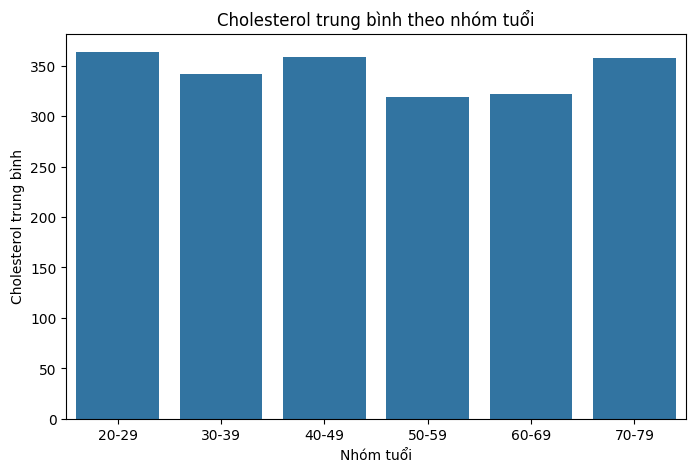

In [19]:
plt.figure(figsize=(8, 5))
sns.barplot(x=grouped['age'], y=grouped['chol'])
plt.title("Cholesterol trung bình theo nhóm tuổi")
plt.xlabel("Nhóm tuổi")
plt.ylabel("Cholesterol trung bình")
plt.show()

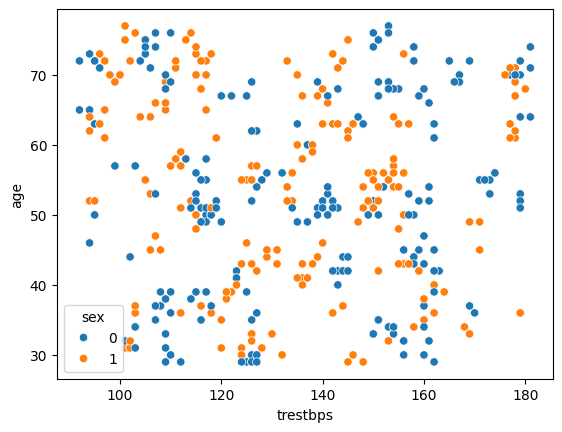

In [20]:
sns.scatterplot(data=HD_df, x='trestbps', y='age',hue='sex')
plt.show()

##### > Qua đó ta có thể thấy, Huyết Áp và tuổi KHÔNG CÓ mối liên hệ mật thiết

##### > Người trẻ có thể có huyết áp cao hoặc người già có thể có huyết áp thấp và ngược lại

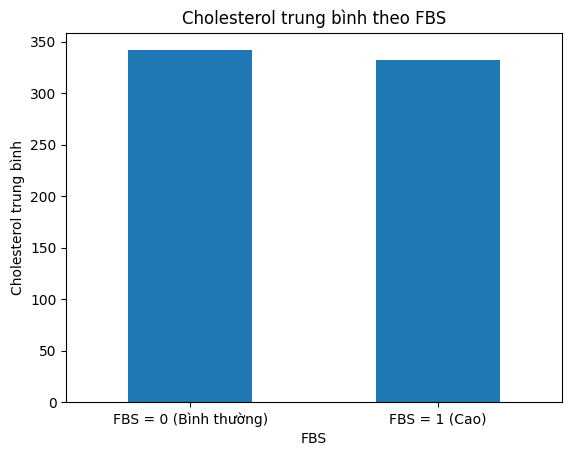

------------------------------------------------------------
Số liệu cụ thể
 fbs       chol
   0 341.746667
   1 331.960000


In [21]:
fbs_chol = HD_df.groupby('fbs')['chol'].mean()
fbs_chol.plot(kind='bar')

plt.xticks([0, 1], ['FBS = 0 (Bình thường)', 'FBS = 1 (Cao)'], rotation=0)
plt.title('Cholesterol trung bình theo FBS')
plt.ylabel('Cholesterol trung bình')
plt.xlabel('FBS')
plt.show()
print("------------------------------------------------------------")
print("Số liệu cụ thể")
print(fbs_chol.reset_index().to_string(index=False))

##### > Có thể thấy lượng cholesterol trung bình giữa người có đường huyết cao và người có đường huyết thấp là tương đồng với nhau

##### > Vì về cơ bản, cholesterol không phải là đường, nên nó không ảnh hưởng đến đường huyết

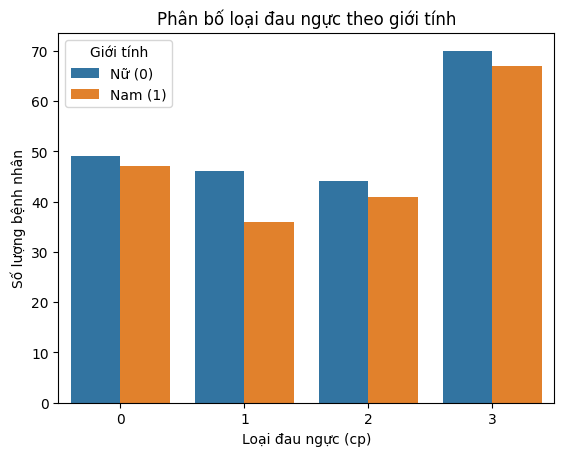

------------------------------------------------------------
Số liệu cụ thể
Nam: 
cp
0    47
1    36
2    41
3    67
 
Nữ: 
cp
0    49
1    46
2    44
3    70
Name: sex, dtype: int64


In [22]:
sns.countplot(data=HD_df, x='cp', hue='sex')
plt.xlabel("Loại đau ngực (cp)")
plt.ylabel("Số lượng bệnh nhân")
plt.title("Phân bố loại đau ngực theo giới tính")
plt.legend(title="Giới tính", labels=["Nữ (0)", "Nam (1)"])
plt.show()
print("------------------------------------------------------------")
print("Số liệu cụ thể")
gender_cp = HD_df[["cp", "sex"]]
print("Nam: ")
print(gender_cp[gender_cp['sex']==1].groupby('cp')['sex'].count().to_string())
print(" ")
print("Nữ: ")
print(gender_cp[gender_cp['sex']==0].groupby('cp')['sex'].count())